In [19]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [97]:
programs_to_show = ['sequential_frontier', 'mpi_priority_frontier', 'mpi_no_master_frontier']
new_program = 'mpi_priority_frontier'
assert new_program in programs_to_show
old_program = 'sequential_frontier'
assert old_program in programs_to_show

upper_scale = 16

In [21]:
raw_benchmark_results = pd.read_csv('../benchmarks/2020-12-09-euler-16-cores.csv')

raw_benchmark_results.sample(5)

,generation_config_i,input_strategy,input_length_1,input_change_strength,input_chunkiness,input_distribution,regen_i,repetition_i,diff_program,mpi_procs,micros_input,micros_precompute,micros_until_len,micros_edit_script
99,28,add,80400,0.5,0.0,zipf,0,1,mpi_no_master_frontier,128.0,250360,0,229094,0
97,28,add,80400,0.5,0.0,zipf,0,1,sequential_frontier,NaN,17431,0,3523164,0
237,26,remove,60800,1.0,0.0,zipf,0,1,mpi_no_master_frontier,128.0,6650,0,420550,0
14,24,independent,60800,1.0,0.0,zipf,0,0,mpi_no_master_frontier,128.0,13369,0,1724624,0
84,41,addremove,100000,1.0,0.0,zipf,0,0,sequential_frontier,NaN,18371,0,16176927,0


In [22]:
indexed_benchmark_results = raw_benchmark_results.set_index(['generation_config_i', 'regen_i', 'diff_program', 'repetition_i'])
indexed_benchmark_results

input_strategy  \
generation_config_i regen_i diff_program           repetition_i                  
25                  0       sequential_frontier    0                       add   
                                                   1                       add   
                            mpi_no_master_frontier 0                       add   
                                                   1                       add   
                            mpi_priority_frontier  0                       add   
...                                                                        ...   
32                  0       sequential_frontier    1                       add   
                            mpi_no_master_frontier 0                       add   
                                                   1                       add   
                            mpi_priority_frontier  0                       add   
                                                   1                       add   

                                                                 input_length_1  \
generation_config_i regen_i diff_program           repetition_i                   
25                  0       sequential_frontier    0                      60800   
                                                   1                      60800   
                            mpi_no_master_frontier 0                      60800   
                                                   1                      60800   
                            mpi_priority_frontier  0                      60800   
...                                                                         ...   
32                  0       sequential_frontier    1                      80400   
                            mpi_no_master_frontier 0                      80400   
                                                   1                      80400   
                            mpi_priority_frontier  0                      80400   
                                                   1                      80400   

                                                                 input_change_strength  \
generation_config_i regen_i diff_program           repetition_i                          
25                  0       sequential_frontier    0                               1.0   
                                                   1                               1.0   
                            mpi_no_master_frontier 0                               1.0   
                                                   1                               1.0   
                            mpi_priority_frontier  0                               1.0   
...                                                                                ...   
32                  0       sequential_frontier    1                               1.0   
                            mpi_no_master_frontier 0                               1.0   
                                                   1                               1.0   
                            mpi_priority_frontier  0                               1.0   
                                                   1                               1.0   

                                                                 input_chunkiness  \
generation_config_i regen_i diff_program           repetition_i                     
25                  0       sequential_frontier    0                          0.0   
                                                   1                          0.0   
                            mpi_no_master_frontier 0                          0.0   
                                                   1                          0.0   
                            mpi_priority_frontier  0                          0.0   
...                                                                           ...   
32                  0       sequential_frontier    1              

In [23]:
unique_regen_i_values = sorted(np.unique(indexed_benchmark_results.index.get_level_values('regen_i').values))
assert(unique_regen_i_values == [0])

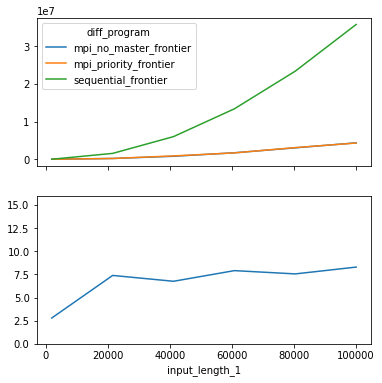

In [98]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
temp = temp[temp['input_strategy'] == 'independent']
temp = temp.set_index('input_length_1', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp[old_program] / temp[new_program]).plot(ax=ax[1], ylim=(0, upper_scale));

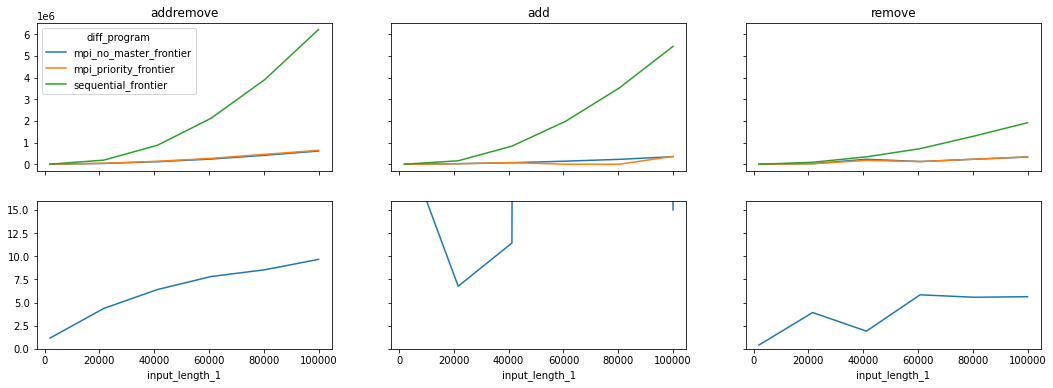

In [99]:
fig, ax = plt.subplots(2, 3, figsize=(18, 6), sharex=True, sharey='row')
for input_strategy_i, input_strategy in enumerate(['addremove', 'add', 'remove']):
    temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
    temp = temp[(temp['input_strategy'] == input_strategy) & (temp['input_change_strength'] == 1/2) & (temp['input_chunkiness'] == 0)]
    temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
    temp = temp.set_index('input_length_1', append=True)
    temp = temp.unstack('diff_program')['micros_until_len']
    temp = temp.droplevel('generation_config_i')
    temp = temp.sort_index()

    temp.plot(ax=ax[0][input_strategy_i], legend=(input_strategy_i == 0), title=input_strategy);
    (temp[old_program] / temp[new_program]).plot(ax=ax[1][input_strategy_i], ylim=(0, upper_scale));

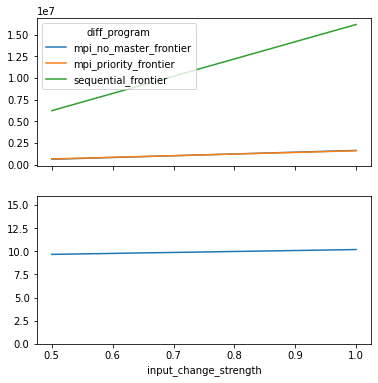

In [100]:
fig, ax = plt.subplots(2, 1, figsize=(6, 6), sharex=True)

temp = indexed_benchmark_results.groupby(['generation_config_i', 'diff_program']).min()
temp = temp[(temp['input_strategy'] == 'addremove') & (temp['input_length_1'] == temp['input_length_1'].max()) & (temp['input_chunkiness'] == 0)]
temp = temp[temp.index.get_level_values('diff_program').isin(programs_to_show)]
temp = temp.set_index('input_change_strength', append=True)
temp = temp.unstack('diff_program')['micros_until_len']
temp = temp.droplevel('generation_config_i')
temp = temp.sort_index()

temp.plot(ax=ax[0]);
(temp[old_program] / temp[new_program]).plot(ax=ax[1], ylim=(0, upper_scale));

0.9642857142857143
0.9642857142857143
0.023809523809523808


""


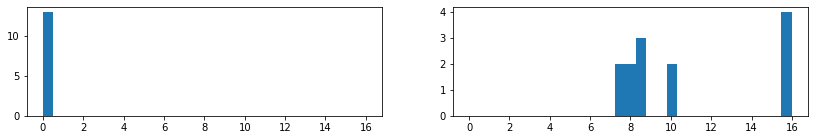

In [101]:
temp = indexed_benchmark_results
temp = temp['micros_until_len'].unstack('diff_program')
print((temp[new_program] < temp[old_program]).mean())
print((1.1 * temp[new_program] < temp[old_program]).mean())
print((temp[new_program] > 1.1 * temp[old_program]).mean())

temp = temp[(temp > 10e6).any(axis=1)]

fig, ax = plt.subplots(1, 2, figsize=(14, 2), sharex=True)
bins = np.linspace(0, upper_scale, 2 * upper_scale)
hist_values = temp[new_program] / temp[old_program]
hist_values = hist_values.clip(upper=upper_scale)
ax[0].hist(hist_values, bins=bins);
hist_values = temp[old_program] / temp[new_program]
hist_values = hist_values.clip(upper=upper_scale)
ax[1].hist(hist_values, bins=bins);

beaten_rows = []
for generation_config_i in temp[temp[new_program] > 1.1 * temp[old_program]].index.get_level_values('generation_config_i'):
    beaten_rows.append(indexed_benchmark_results.xs(generation_config_i, level='generation_config_i').iloc[0].to_dict())
pd.DataFrame(beaten_rows)